In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


In [82]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/krobus00/IoT-Assignment-1/master/dataset/12.csv',
    names=['#', 'x', 'y', 'z', '*']
)


In [83]:
df.describe()

,#,x,y,z,*
count,114702.000000,114702.000000,114702.00000,114702.000000,114702.000000
mean,57350.499991,1864.727686,2336.80506,1994.973985,2.989460
std,33111.759652,77.200356,62.55988,82.177410,2.073787
min,0.000000,1528.000000,1975.00000,1573.000000,0.000000
25%,28675.250000,1802.000000,2319.00000,1948.000000,1.000000
50%,57350.500000,1858.000000,2341.00000,1993.000000,3.000000
75%,86025.750000,1943.000000,2354.00000,2051.000000,4.000000
max,114700.000000,2167.000000,3120.00000,2596.000000,7.000000


In [84]:
df.tail(5)


,#,x,y,z,*
114697,114700.0,1775,2323,1973,7
114698,114700.0,1770,2322,1978,7
114699,114700.0,1762,2319,1993,7
114700,114700.0,1761,2311,2013,7
114701,114700.0,1758,2303,2017,0


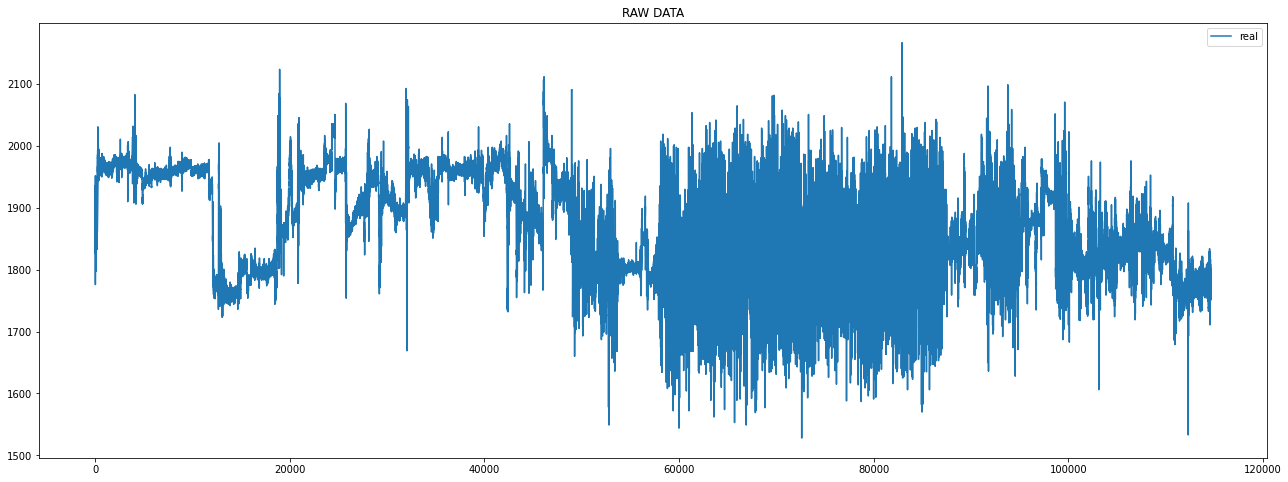

In [85]:
df['x'].plot(figsize=(22, 8), label="real", title="RAW DATA")
plt.legend()

In [86]:
def butter_lowpass_filter(data, cutoff, order):
    b, a = butter(
        order,
        cutoff,
        btype='lowpass',
        analog=False,
        output="ba"
    )
    y = filtfilt(b, a, data)
    return y


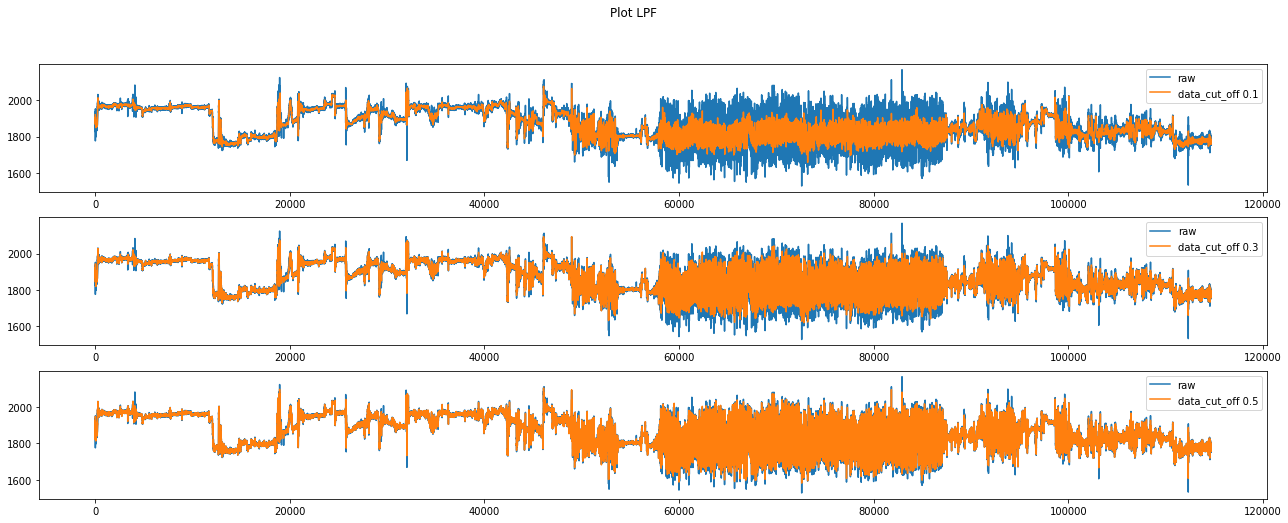

In [87]:
df_lpf = df
list_cut_off = [0.1, 0.3, 0.5]
fig, axs = plt.subplots(len(list_cut_off), figsize=(22, 8))
fig.suptitle('Plot LPF')
for i, cut_off in enumerate(list_cut_off):
    x = butter_lowpass_filter(df_lpf['x'], cutoff=cut_off, order=2)
    temp = pd.DataFrame(x)
    axs[i].plot(df_lpf['x'], label="raw")
    axs[i].plot(temp, label='data_cut_off {}'.format(cut_off))
    axs[i].legend(loc="upper right")


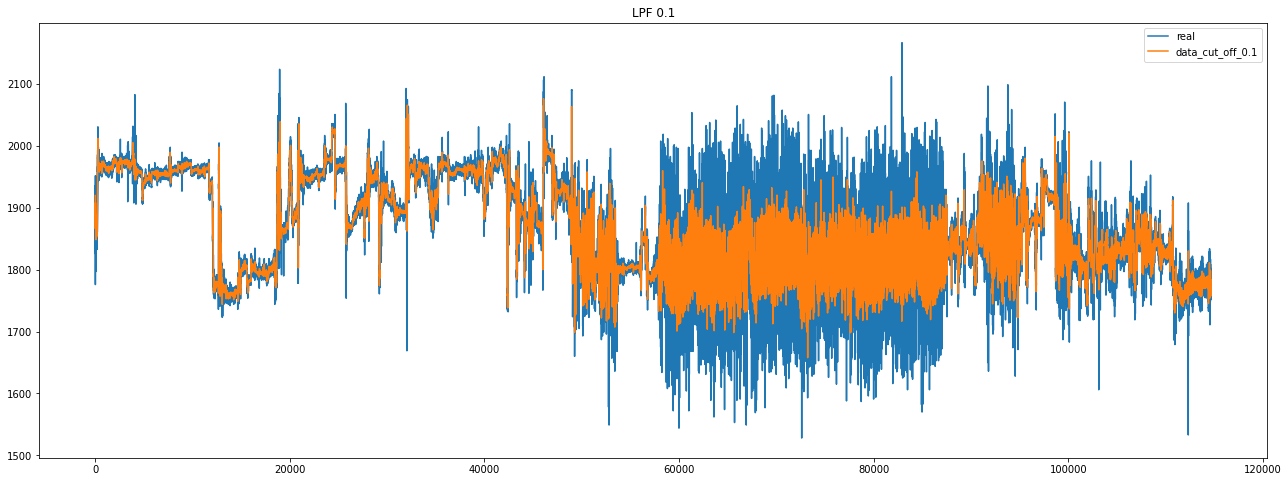

In [88]:
df_lpf['x'].plot(figsize=(22, 8), label="real", title="LPF 0.1")
x = butter_lowpass_filter(df_lpf['x'], cutoff=0.1, order=2)
df_lpf = pd.DataFrame(x)
df_lpf[0].plot(label="data_cut_off_0.1")
plt.legend()


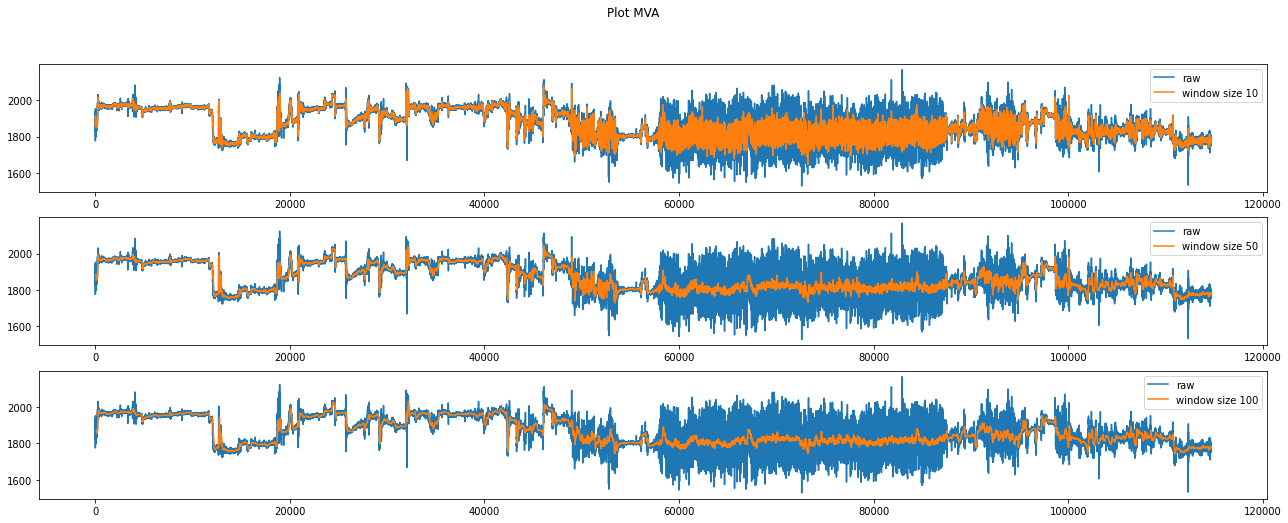

In [89]:
df_mva = df
window_size = [10, 50, 100]
fig, axs = plt.subplots(len(window_size), figsize=(22, 8))
fig.suptitle('Plot MVA')

for i, size in enumerate(window_size):
    temp = df_mva['x'].rolling(window=size).mean()
    axs[i].plot(df_mva['x'], label="raw")
    axs[i].plot(temp, label='window size {}'.format(size))
    axs[i].legend(loc="upper right")

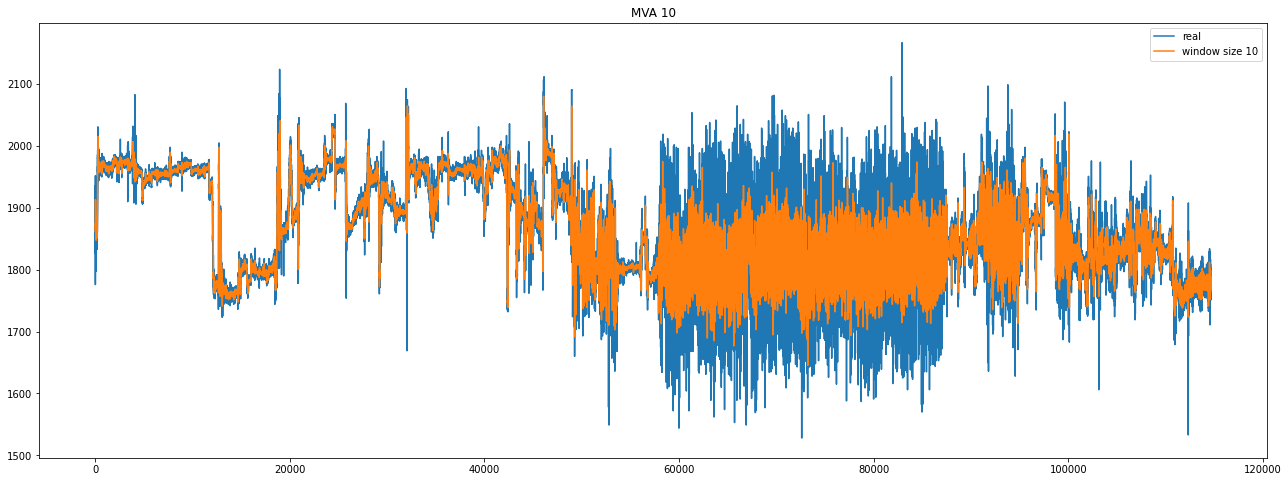

In [90]:
df_mva = df
df_mva['x'].plot(figsize=(22, 8), label="real", title="MVA 10")
df_mva['x'].rolling(window=10).mean().plot(label="window size 10")
plt.legend()